In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

# Loading the Data

In [2]:
wal = pd.read_csv(r"walmart_cleaned.csv")

In [3]:
wal.shape

(421570, 17)

In [4]:
wal.head(5)

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [5]:
wal.Dept.value_counts()

1.0     6435
82.0    6435
46.0    6435
90.0    6435
14.0    6435
        ... 
78.0     235
77.0     150
65.0     143
39.0      16
43.0      12
Name: Dept, Length: 81, dtype: int64

In [6]:
wal.shape

(421570, 17)

In [7]:
wal.columns

Index(['Unnamed: 0', 'Store', 'Date', 'IsHoliday', 'Dept', 'Weekly_Sales',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size'],
      dtype='object')

In [8]:
wal = wal.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'], axis = 1)

In [9]:
wal = wal.drop(['Unnamed: 0'], axis = 1)

In [10]:
wal['Date'] = pd.to_datetime(wal['Date'])

In [11]:
wal.set_index('Date', inplace=True)

In [12]:
wal.head(5)

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,211.096358,8.106,3,151315
2010-02-05,1,0,26.0,11737.12,42.31,2.572,211.096358,8.106,3,151315
2010-02-05,1,0,17.0,13223.76,42.31,2.572,211.096358,8.106,3,151315
2010-02-05,1,0,45.0,37.44,42.31,2.572,211.096358,8.106,3,151315
2010-02-05,1,0,28.0,1085.29,42.31,2.572,211.096358,8.106,3,151315


# Displaying the data summary

In [13]:
print(wal.describe())

               Store      IsHoliday           Dept   Weekly_Sales  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       22.200546       0.070358      44.260317   15981.258123   
std        12.785297       0.255750      30.492054   22711.183519   
min         1.000000       0.000000       1.000000   -4988.940000   
25%        11.000000       0.000000      18.000000    2079.650000   
50%        22.000000       0.000000      37.000000    7612.030000   
75%        33.000000       0.000000      74.000000   20205.852500   
max        45.000000       1.000000      99.000000  693099.360000   

         Temperature     Fuel_Price            CPI   Unemployment  \
count  421570.000000  421570.000000  421570.000000  421570.000000   
mean       60.090059       3.361027     171.201947       7.960289   
std        18.447931       0.458515      39.159276       1.863296   
min        -2.060000       2.472000     126.064000       3.879000   
25%        46.680000       2.9330

# Plot histogram on numerical columns

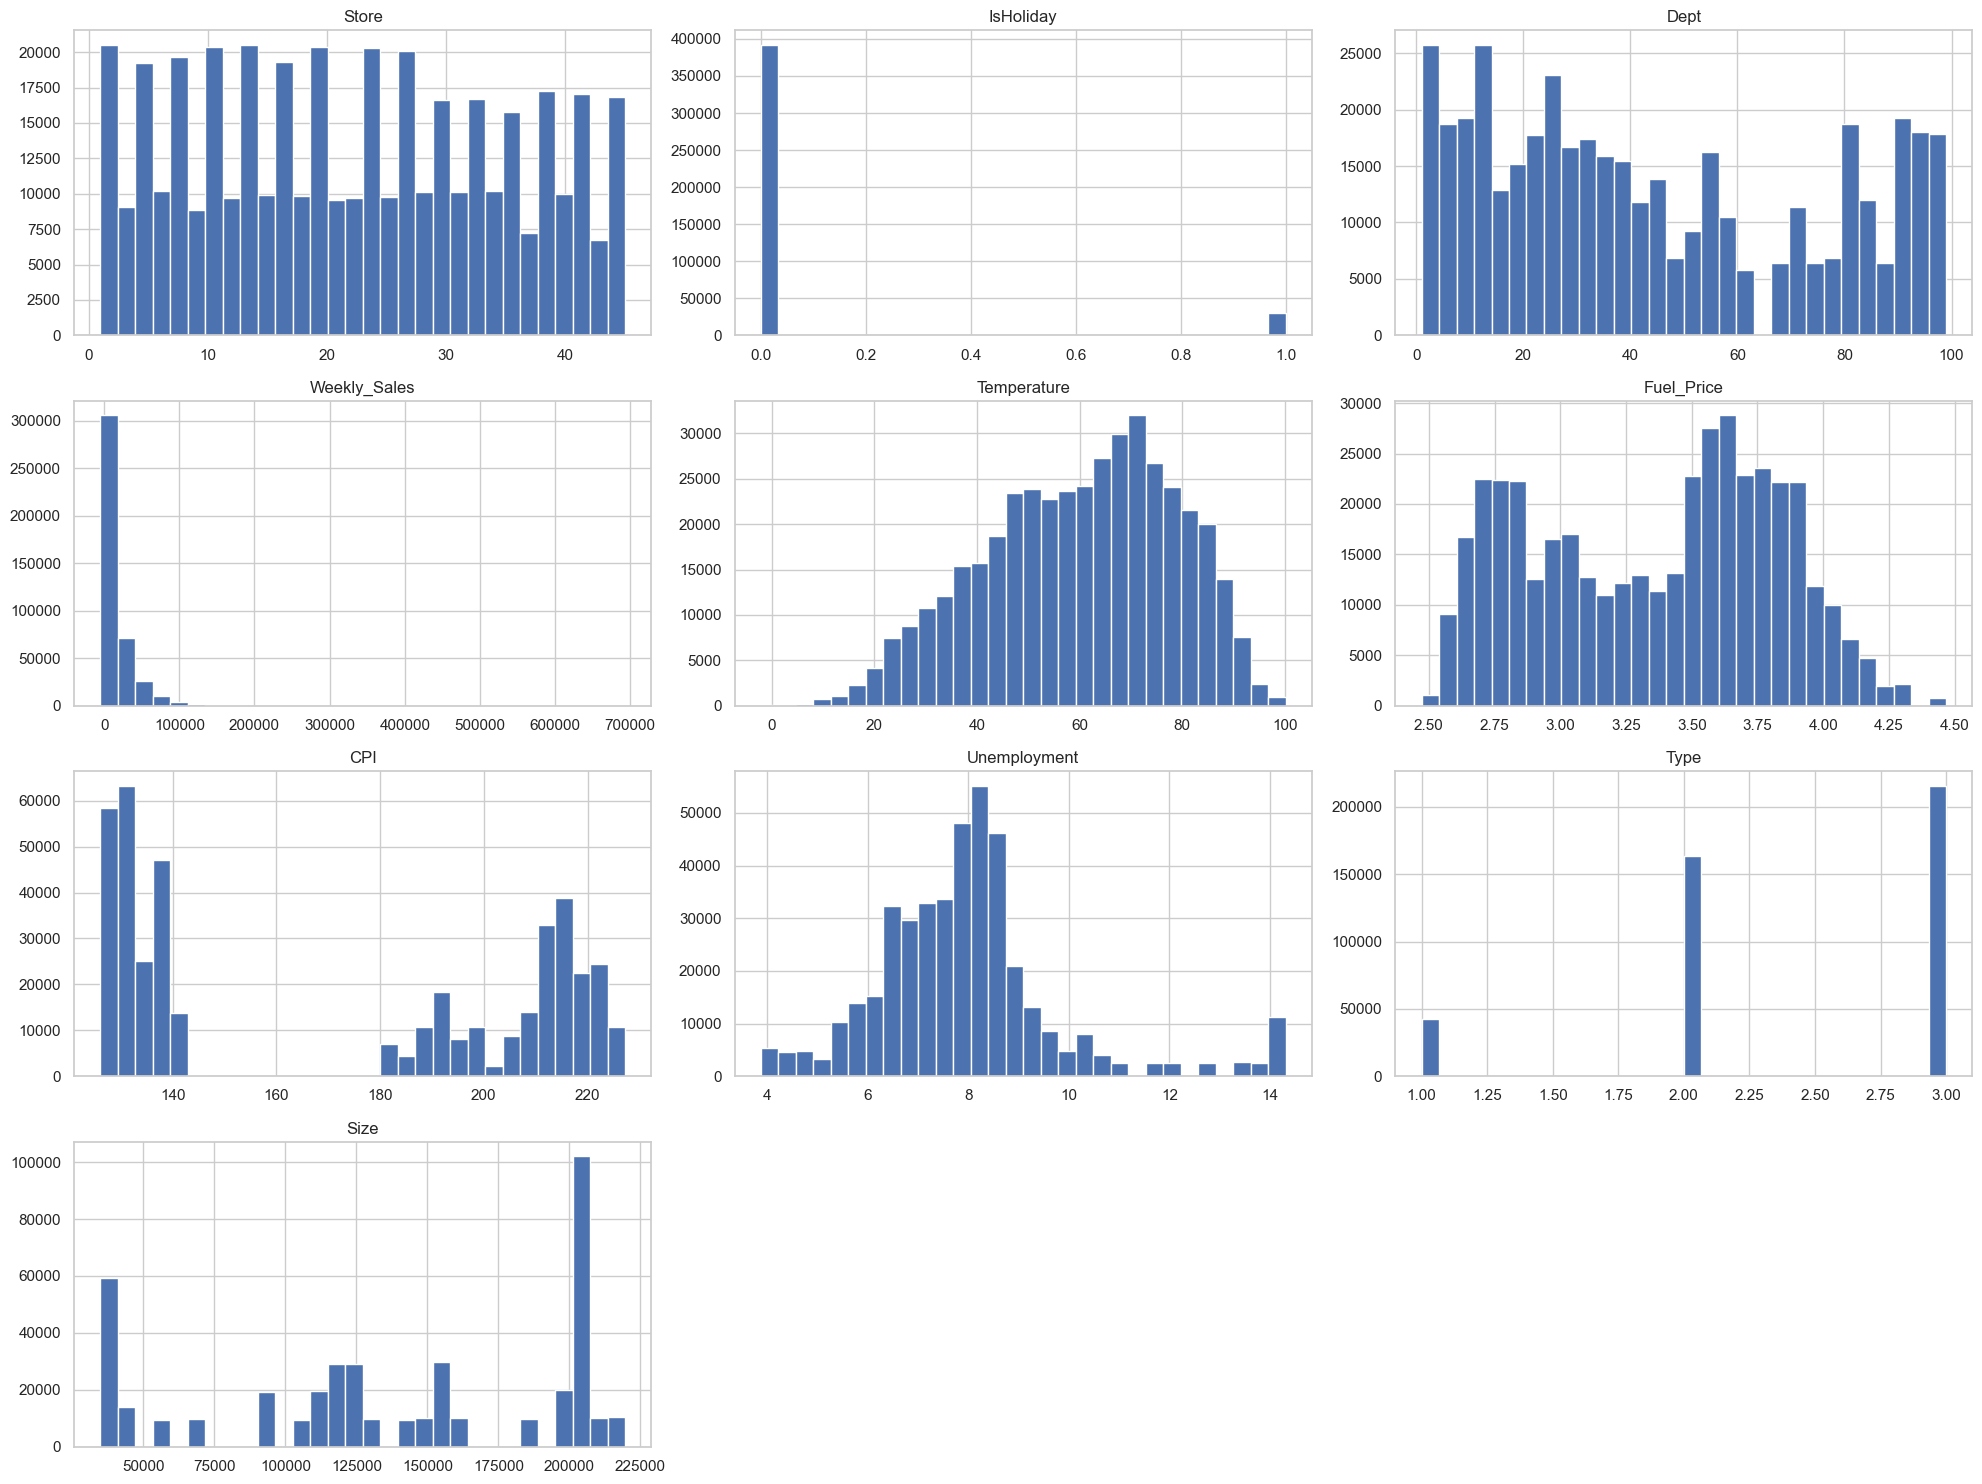

In [14]:
sns.set(style="whitegrid")

wal.hist(bins = 30, figsize=(20, 15))
plt.tight_layout()
plt.show()

IsHoliday: This is a binary variable indicating whether a week is a holiday week or not. It is expected to have fewer holiday weeks than non-holiday weeks, as holidays are relatively less frequent.

CPI, Temperature, and Unemployment: These columns appear to have a more or less normal distribution. The distribution of Temperature is slightly left-skewed, indicating that lower temperatures may be more common. CPI (Consumer Price Index) and Unemployment seem to have a relatively symmetric distribution.

Fuel_Price: The distribution of Fuel_Price is slightly right-skewed. This suggests that higher fuel prices are less common, and lower prices are more frequently observed.

Weekly_Sales: The distribution of Weekly_Sales is heavily right-skewed. This indicates that higher sales amounts are less common, while lower sales amounts occur more frequently.

Size and Type: The observations suggest that larger stores (reflected by the "Size" column) and type 3 stores (reflected by the "Type" column) are more common in the dataset. This could imply that the majority of stores in the dataset are larger and belong to type 3.

#  Calculating the correlation metrics

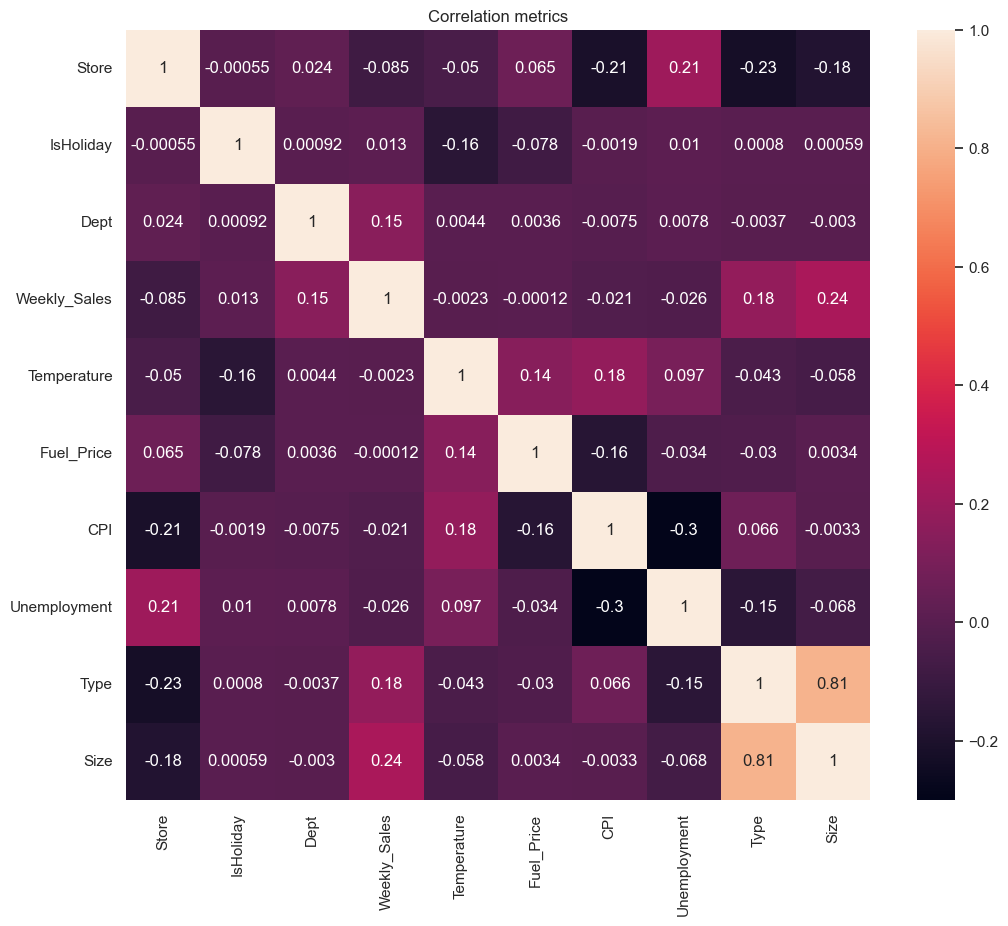

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(wal.corr(), annot= True)
plt.title("Correlation metrics");

Weekly_Sales-Size --->  There is a positive co-relation between weekly-sales and size it means that big size stores have more sales so size is influencing the weekly sales

Weekly sales-dept ---> This positive co-relation between weekly sales and dept implies that few departments in the stores tend to to have high sales

Weekly sales-type --->There is a positive co-relation between weekly sales and type which might claims that certain types do influence the sales in the store

In [16]:
wal.head(2)

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
Date,,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,211.096358,8.106,3,151315
2010-02-05,1,0,26.0,11737.12,42.31,2.572,211.096358,8.106,3,151315


# Plot of weekly - sales over time

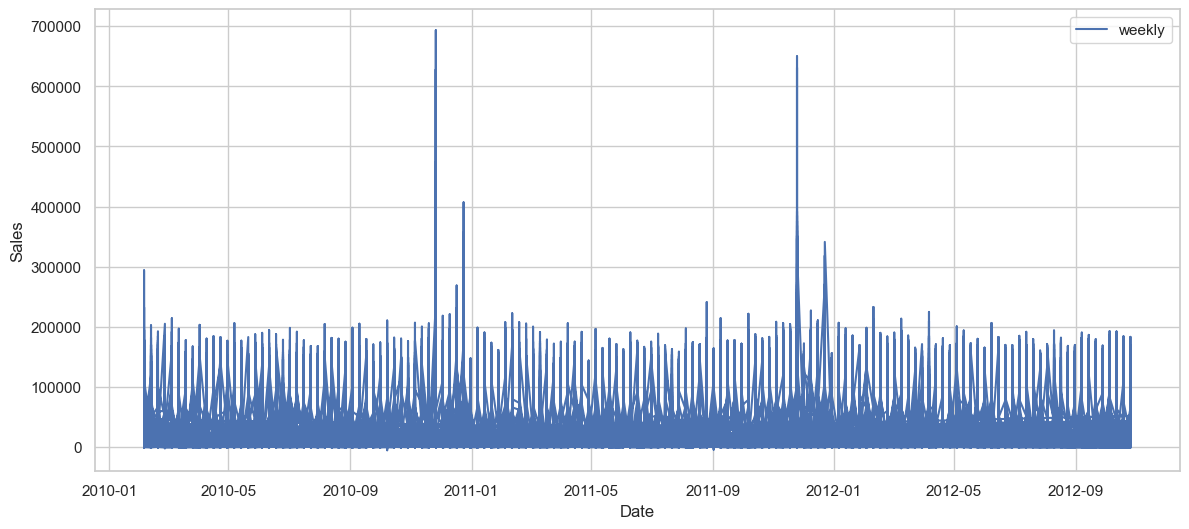

In [17]:
plt.figure(figsize=(14,6))
plt.plot(wal['Weekly_Sales'], label = "weekly")
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

This graph clearly shows that weekly sales seems to suddenly peaks up at certain period of time like the year end seasons sales maybe.

# Weekly sales during holidays and non-holidays

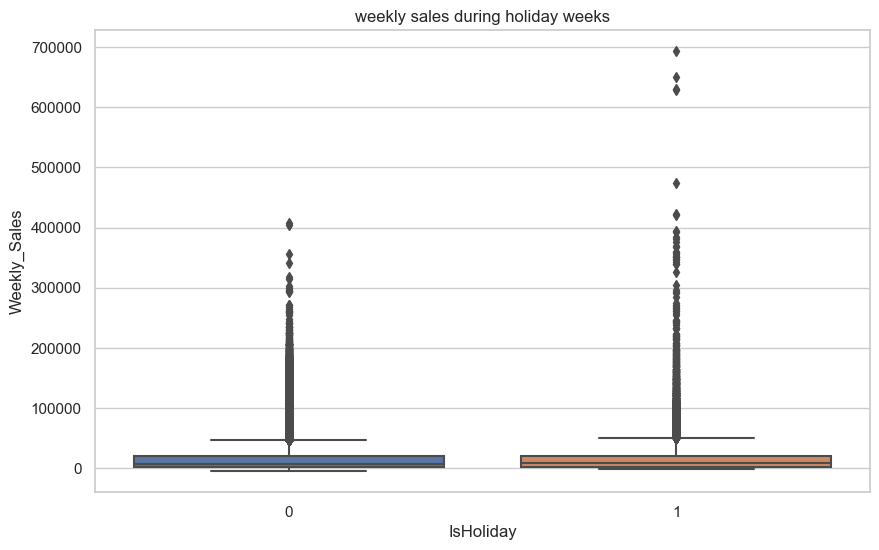

In [18]:
plt.figure(figsize=(10,6))
sns.boxplot(x = 'IsHoliday', y ='Weekly_Sales', data = wal)
plt.title("weekly sales during holiday weeks");

We can clearly see the median of holidays are slightly more than the non-holiday ones which is expected as people spend more on the holidays. So, it clearly shows that weekly sales on holiday more. However the range of both holiday and non-holiday seems very wide.

lets build forcasting model using method for time series forcasting such as arima --> Autoregressive integrated moving average

However, forecasting at this level might not be very meaningful due to the high level of aggregation. It may be more useful to forecast sales for individual stores or departments, or to use additional features like IsHoliday, Dept, Store, etc., in a machine learning model.

# Outliers Detection

In [19]:
from scipy.stats import zscore

# calculating the z-score of the weekly sales column
wal['zscore_sales'] = zscore(wal['Weekly_Sales'])

# defining the threshold for detecting the outliers as after the zscore column would be scaled
threshold = 3

# identifying outliers
outliers = wal[abs(wal['zscore_sales']) > threshold]

# number of outliers
len(outliers)

8848

This number 8848 describes the outliers present in the weekly sales column which we got using the z-score method. But assuming the z score method is a normal distribution method but our data is highly skewed at some places so assuming the same number as outlier might be wrong because maybe these numbers are representing the heavy tailed distribution of the data.

# Running the Dickey-fuller test

In [20]:
def check_stationary(df):
    from statsmodels.tsa.stattools import adfuller
    pvalue = adfuller(df)[1]
    print(pvalue)
    if pvalue < .05 :
        print("data is stationary")
    else :
        print("data is not stationary") 

In [90]:
check_stationary(w2)

2.675979158986058e-07
data is stationary


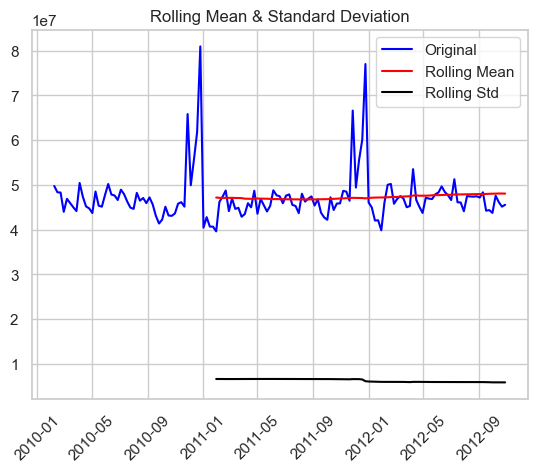

Results of Dickey-Fuller Test:
Test Statistic                -5.908298e+00
p-value                        2.675979e-07
#Lags Used                     4.000000e+00
Number of Observations Used    1.380000e+02
Critical Value (1%)           -3.478648e+00
Critical Value (5%)           -2.882722e+00
Critical Value (10%)          -2.578065e+00
dtype: float64


In [22]:
from statsmodels.tsa.stattools import adfuller

# Create a time series dataset
ts_data = wal['Weekly_Sales'].resample('W').sum()
# 'w' stands for weekly resampling

# Define a function to test the stationarity of a time series
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=52).mean()
    rolstd = timeseries.rolling(window=52).std()
    # Plot rolling statistics
    fig, ax = plt.subplots()
    ax.plot(timeseries, color='blue', label='Original')
    ax.plot(rolmean, color='red', label='Rolling Mean')
    ax.plot(rolstd, color='black', label='Rolling Std')
    ax.legend(loc='best')
    ax.set_title('Rolling Mean & Standard Deviation')
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()
    
    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Test the stationarity of the time series data
test_stationarity(ts_data)

The dickey-filler test is one of the tests to check whether the data is stationary or not. In this test the null hypothesis is that the time series data is not stationary and alternative is exactly oposite od it. If the statistic value less than the critical value than null will be rejected and conclude that the series is stationary.

Based on our test the statistcal value -5.908298e+00 is less than the Critical Values at 1% (-3.47), 5% (-2.88), and 10% (-2.57). so, we reject the null and accept the alternate which is our series is stationary.

Now that we have a stationary time series, let's proceed with the ARIMA model for forecasting. To determine the parameters of the ARIMA model, we consider the following definitions:

p: The number of lag observations included in the model, also known as the lag order.
d: The number of times the raw observations are differenced, also called the degree of differencing.
q: The size of the moving average window, also known as the order of the moving average.

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [24]:
w2 = pd.DataFrame(wal.groupby('Date').agg({'Weekly_Sales':"sum"}))
# grouping all the sales done on their respective dates

In [29]:
w2

,Weekly_Sales
Date,
2010-02-05,49750740.50
2010-02-12,48336677.63
2010-02-19,48276993.78
2010-02-26,43968571.13
2010-03-05,46871470.30
...,...
2012-09-28,43734899.40
2012-10-05,47566639.31
2012-10-12,46128514.25


In [30]:
abc= seasonal_decompose(w2)

In [31]:
w2.shape
# checking the sum as per the dates are summed up or not

(143, 1)

<Figure size 3000x800 with 0 Axes>

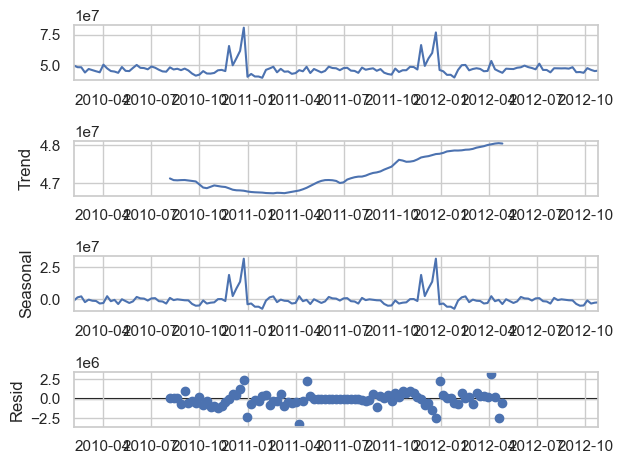

In [32]:
plt.figure(figsize = (30,8))
abc.plot();

In [33]:
from pmdarima import auto_arima

In [34]:
auto_arima(w2, seasonal=True, m=52 )
# getting the values of p,d,q and these values will be passed in the sarima x model

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 0, 0, 52),
      suppress_warnings=True)

In [35]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
model_sarima = SARIMAX(w2, order=(2,0,2), seasonal_order=(1,0,0,52))

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [38]:
results = model_sarima.fit()
# model is built using sarima x function but model build is arima model

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [39]:
421570 / 143 
# one weekly sales has these many per records present 2948 records are coming per week more of up and down 

2948.041958041958

In [40]:
predicted = results.predict(start = 143, end = 195)
predicted
# forcasting the values beyond 143 for the next year to be precise 

2012-11-02    4.755953e+07
2012-11-09    4.741271e+07
2012-11-16    4.587478e+07
2012-11-23    5.970212e+07
2012-11-30    4.774498e+07
2012-12-07    5.194522e+07
2012-12-14    5.494171e+07
2012-12-21    6.652271e+07
2012-12-28    4.512528e+07
2013-01-04    4.432135e+07
2013-01-11    4.220409e+07
2013-01-18    4.218352e+07
2013-01-25    4.054370e+07
2013-02-01    4.477922e+07
2013-02-08    4.738725e+07
2013-02-15    4.745067e+07
2013-02-22    4.431999e+07
2013-03-01    4.500214e+07
2013-03-08    4.534431e+07
2013-03-15    4.487791e+07
2013-03-22    4.348462e+07
2013-03-29    4.360771e+07
2013-04-05    4.918863e+07
2013-04-12    4.439243e+07
2013-04-19    4.324470e+07
2013-04-26    4.224304e+07
2013-05-03    4.451117e+07
2013-05-10    4.430566e+07
2013-05-17    4.416170e+07
2013-05-24    4.482775e+07
2013-05-31    4.502294e+07
2013-06-07    4.589638e+07
2013-06-14    4.497296e+07
2013-06-21    4.439338e+07
2013-06-28    4.358657e+07
2013-07-05    4.672129e+07
2013-07-12    4.310801e+07
2

In [41]:
# pred_value_original_scale = np.exp(predicted)
# # taking anti log

In [42]:
pred_value_original_scale = np.round(predicted)
pred_value_original_scale

2012-11-02    47559531.0
2012-11-09    47412711.0
2012-11-16    45874776.0
2012-11-23    59702124.0
2012-11-30    47744977.0
2012-12-07    51945222.0
2012-12-14    54941713.0
2012-12-21    66522713.0
2012-12-28    45125282.0
2013-01-04    44321348.0
2013-01-11    42204089.0
2013-01-18    42183516.0
2013-01-25    40543702.0
2013-02-01    44779225.0
2013-02-08    47387248.0
2013-02-15    47450665.0
2013-02-22    44319991.0
2013-03-01    45002144.0
2013-03-08    45344309.0
2013-03-15    44877912.0
2013-03-22    43484619.0
2013-03-29    43607706.0
2013-04-05    49188634.0
2013-04-12    44392428.0
2013-04-19    43244701.0
2013-04-26    42243044.0
2013-05-03    44511172.0
2013-05-10    44305662.0
2013-05-17    44161704.0
2013-05-24    44827752.0
2013-05-31    45022936.0
2013-06-07    45896380.0
2013-06-14    44972956.0
2013-06-21    44393384.0
2013-06-28    43586573.0
2013-07-05    46721285.0
2013-07-12    43108006.0
2013-07-19    43013495.0
2013-07-26    41595809.0
2013-08-02    43860224.0


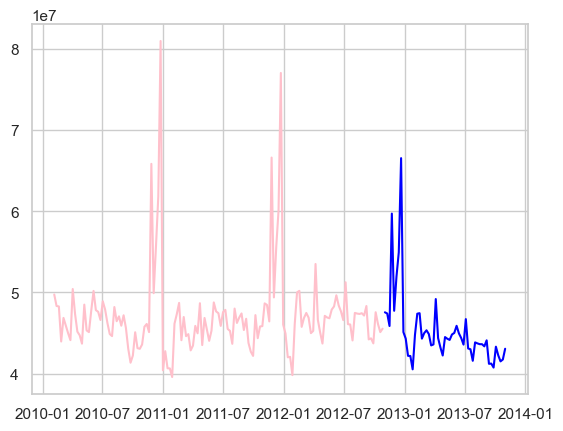

In [43]:
plt.plot(w2, color = 'pink', label = '2010-02-05 to 2012-10-26')
plt.plot(pred_value_original_scale, color = 'blue', label = '2012-11-02 to 2013-11-01')

In [44]:
w2.index.year.value_counts()

2011    52
2010    48
2012    43
Name: Date, dtype: int64

# Feature Engineering

In [45]:
wal['month'] = wal.index.month

In [46]:
wal['size_type'] = wal['Size']*wal['Type']

In [47]:
wal.isnull().sum()
# checking nulls 

Store           0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
zscore_sales    0
month           0
size_type       0
dtype: int64

In [48]:
wal.info()
# checking if all the columns are numeric or not

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 421570 entries, 2010-02-05 to 2012-10-26
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   IsHoliday     421570 non-null  int64  
 2   Dept          421570 non-null  float64
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  int64  
 9   Size          421570 non-null  int64  
 10  zscore_sales  421570 non-null  float64
 11  month         421570 non-null  int64  
 12  size_type     421570 non-null  int64  
dtypes: float64(7), int64(6)
memory usage: 45.0 MB


# Splitting into train and test

In [49]:
wal.head(4)

,Store,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,zscore_sales,month,size_type
Date,,,,,,,,,,,,,
2010-02-05,1,0,1.0,24924.50,42.31,2.572,211.096358,8.106,3,151315,0.393782,2,453945
2010-02-05,1,0,26.0,11737.12,42.31,2.572,211.096358,8.106,3,151315,-0.186875,2,453945
2010-02-05,1,0,17.0,13223.76,42.31,2.572,211.096358,8.106,3,151315,-0.121416,2,453945
2010-02-05,1,0,45.0,37.44,42.31,2.572,211.096358,8.106,3,151315,-0.702026,2,453945


In [50]:
x = wal.loc[:,['IsHoliday','Dept','Type','CPI','Unemployment','month','size_type']]
y = wal.iloc[::, 3]

# CPI is the average cost price index paid for goods

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
from sklearn.metrics import *

In [53]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=.2, random_state=42)

# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [55]:
linreg.fit(train_x, train_y)

LinearRegression()

In [56]:
rsquare_linreg = rsquare = linreg.score(train_x, train_y)
rsquare

0.08465738809865164

In [57]:
rsquare = linreg.score(test_x, test_y)
rsquare

0.08343834580409881

In [58]:
n = train_x.shape[0]
k = train_x.shape[1]

In [59]:
adj_rsquare = 1-((1-rsquare_linreg)*(n-1)/(n-k-1))
adj_rsquare

0.08463838902887721

In [85]:
pred_linreg = linreg.predict(test_x)

In [87]:
rmse_linreg = np.sqrt(mean_squared_error(test_y, pred_linreg))
rmse_linreg

21800.062455827967

# Random forest regressor

In [60]:
from sklearn.ensemble import RandomForestRegressor

In [61]:
rfc = RandomForestRegressor()

In [62]:
rfc.fit(train_x, train_y)

RandomForestRegressor()

In [88]:
rfc_rsquare = rfc.score(test_x, test_y)
rfc_rsquare

0.9615684112503036

In [89]:
adj_rfc = 1-((1-rfc_rsquare)*(n-1)/(n-k-1))
adj_rfc

0.9615676135550726

In [67]:
pred_rfc = rfc.predict(test_x)

In [74]:
rmse_rfc = np.sqrt(mean_squared_error(test_y, pred_rfc))
rmse_rfc

4463.967921944063

# Deep learning model with keras

In [77]:
import keras 
from keras.layers import Dense
from keras.models import Sequential

In [78]:
model = Sequential()
model.add(Dense(32, input_dim = train_x.shape[1], activation ='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')
model.fit(train_x, train_y, epochs = 10)

Epoch 1/10
10540/10540 [==============================] - 33s 3ms/step - loss: 499966432.0000
Epoch 2/10
10540/10540 [==============================] - 32s 3ms/step - loss: 489583776.0000
Epoch 3/10
10540/10540 [==============================] - 32s 3ms/step - loss: 485487168.0000
Epoch 4/10
10540/10540 [==============================] - 32s 3ms/step - loss: 482648768.0000
Epoch 5/10
10540/10540 [==============================] - 32s 3ms/step - loss: 480768992.0000
Epoch 6/10
10540/10540 [==============================] - 32s 3ms/step - loss: 479539904.0000
Epoch 7/10
10540/10540 [==============================] - 37s 3ms/step - loss: 479144640.0000
Epoch 8/10
10540/10540 [==============================] - 42s 4ms/step - loss: 478264064.0000
Epoch 9/10
10540/10540 [==============================] - 44s 4ms/step - loss: 477232800.0000
Epoch 10/10
10540/10540 [==============================] - 47s 4ms/step - loss: 476533888.0000


In [79]:
predict_nn = model.predict(test_x)

2635/2635 [==============================] - 8s 3ms/step


In [81]:
rmse_nn = np.sqrt(mean_squared_error(test_y, predict_nn))
rmse_nn

21854.281908446577

In [84]:
r2_score_nn = r2_score(test_y, predict_nn)
r2_score_nn

0.07887347167354797

 . Linear regression rmse -- 21800.062455827967, rsquare -- 0.08343834580409881
 . Random forest rmse -- 4463.967921944063, rsquare -- 0.9615684112503036
 . Neural network rmse -- 21854.281908446577 , rsquare -- 0.07887347167354797
 
 It is very clear that random forest regressor turns out to be the bestest among all where the root mean sqaured error is least and determinent of coefficient is higher
 2nd best comes out to be linear regression and lastly neural network.
 hence, random forest regressor is the best fit model for this data.